In [1]:
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage, misc

In [2]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv

Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1))

In [3]:
conv.state_dict()['weight'][0][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [4]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [5]:
z=conv(image)
z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [6]:
K=2
conv1 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=K)
conv1.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv1.state_dict()['bias'][0]=0.0
conv1.state_dict()
conv1

Conv2d(1, 1, kernel_size=(2, 2), stride=(1, 1))

In [7]:
M=4
image1=torch.ones(1,1,M,M)

In [8]:
z1=conv1(image1)
print("z1:",z1)
print("shape:",z1.shape[2:4])

z1: tensor([[[[4., 4., 4.],
          [4., 4., 4.],
          [4., 4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([3, 3])


In [9]:
conv3 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=2)

conv3.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv3.state_dict()['bias'][0]=0.0
conv3.state_dict()

OrderedDict([('weight',
              tensor([[[[1., 1.],
                        [1., 1.]]]])),
             ('bias', tensor([0.]))])

In [10]:
z3=conv3(image1)

print("z3:",z3)
print("shape:",z3.shape[2:4])

z3: tensor([[[[4., 4.],
          [4., 4.]]]], grad_fn=<ConvolutionBackward0>)
shape: torch.Size([2, 2])


In [15]:
image1

tensor([[[[1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.],
          [1., 1., 1., 1.]]]])

In [12]:
conv4 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv4.state_dict()['bias'][0]=0.0
conv4.state_dict()
z4=conv4(image1)
print("z4:",z4)
print("z4:",z4.shape[2:4])

z4: tensor([[[[4.]]]], grad_fn=<ConvolutionBackward0>)
z4: torch.Size([1, 1])


In [16]:
conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=2,stride=3,padding=1)

conv5.state_dict()['weight'][0][0]=torch.tensor([[1.0,1.0],[1.0,1.0]])
conv5.state_dict()['bias'][0]=0.0
conv5.state_dict()
z5=conv5(image1)
print("z5:",z5)
print("z5:",z4.shape[2:4])

z5: tensor([[[[1., 2.],
          [2., 4.]]]], grad_fn=<ConvolutionBackward0>)
z5: torch.Size([1, 1])


In [17]:
Image=torch.randn((1,1,4,4))
Image

tensor([[[[ 0.8815,  1.4828,  0.2767, -2.2213],
          [ 0.0783, -0.3558,  1.4428,  0.1036],
          [-0.1250, -0.2547,  0.8316, -0.8123],
          [ 1.0810,  1.4905, -0.6764,  0.1759]]]])

In [18]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv.state_dict()['weight'][0][0]=torch.tensor([[0,0,0],[0,0,0],[0,0.0,0]])
conv.state_dict()['bias'][0]=0.0

<h2>Activation Functions and Max Polling</h2>

In [19]:
conv = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0,-1.0]])
conv.state_dict()['weight'][0][0]=Gx
conv.state_dict()['bias'][0]=0.0
conv.state_dict()

OrderedDict([('weight',
              tensor([[[[ 1.,  0., -1.],
                        [ 2.,  0., -2.],
                        [ 1.,  0., -1.]]]])),
             ('bias', tensor([0.]))])

In [20]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

In [21]:
Z=conv(image)
Z

tensor([[[[-4.,  0.,  4.],
          [-4.,  0.,  4.],
          [-4.,  0.,  4.]]]], grad_fn=<ConvolutionBackward0>)

In [22]:
A=torch.relu(Z)
A

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [23]:
relu = nn.ReLU()
relu(Z)

tensor([[[[0., 0., 4.],
          [0., 0., 4.],
          [0., 0., 4.]]]], grad_fn=<ReluBackward0>)

In [24]:
image1=torch.zeros(1,1,4,4)
image1[0,0,0,:]=torch.tensor([1.0,2.0,3.0,-4.0])
image1[0,0,1,:]=torch.tensor([0.0,2.0,-3.0,0.0])
image1[0,0,2,:]=torch.tensor([0.0,2.0,3.0,1.0])

image1

tensor([[[[ 1.,  2.,  3., -4.],
          [ 0.,  2., -3.,  0.],
          [ 0.,  2.,  3.,  1.],
          [ 0.,  0.,  0.,  0.]]]])

In [25]:
max1=torch.nn.MaxPool2d(2,stride=1)
max1(image1)

tensor([[[[2., 3., 3.],
          [2., 3., 3.],
          [2., 3., 3.]]]])

In [26]:
max1=torch.nn.MaxPool2d(2)
max1(image1)

tensor([[[[2., 3.],
          [2., 3.]]]])

<h2>Multiple Input and Output Channels</h2>

In [27]:
conv1 = nn.Conv2d(in_channels=1, out_channels=3,kernel_size=3)

In [28]:
Gx=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
Gy=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

conv1.state_dict()['weight'][0][0]=Gx
conv1.state_dict()['weight'][1][0]=Gy
conv1.state_dict()['weight'][2][0]=torch.ones(3,3)

In [29]:
conv1.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])
conv1.state_dict()['bias']

tensor([0., 0., 0.])

In [30]:
for x in conv1.state_dict()['weight']:
    print(x)

tensor([[[ 1.,  0., -1.],
         [ 2.,  0., -2.],
         [ 1.,  0., -1.]]])
tensor([[[ 1.,  2.,  1.],
         [ 0.,  0.,  0.],
         [-1., -2., -1.]]])
tensor([[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]])


In [31]:
image=torch.zeros(1,1,5,5)
image[0,0,:,2]=1
image

tensor([[[[0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0.]]]])

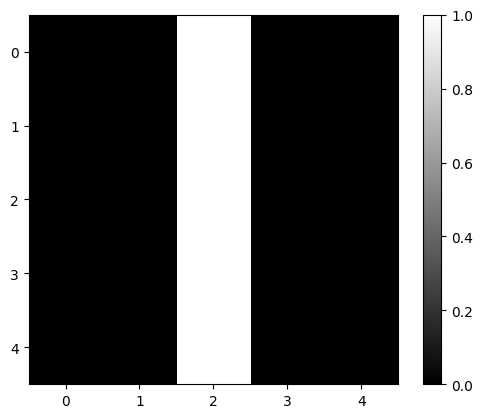

In [32]:
plt.imshow(image[0,0,:,:].numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.colorbar()
plt.show()

In [33]:
out=conv1(image)

In [34]:
out.shape

torch.Size([1, 3, 3, 3])

tensor([[-4.,  0.,  4.],
        [-4.,  0.,  4.],
        [-4.,  0.,  4.]], grad_fn=<UnbindBackward0>)


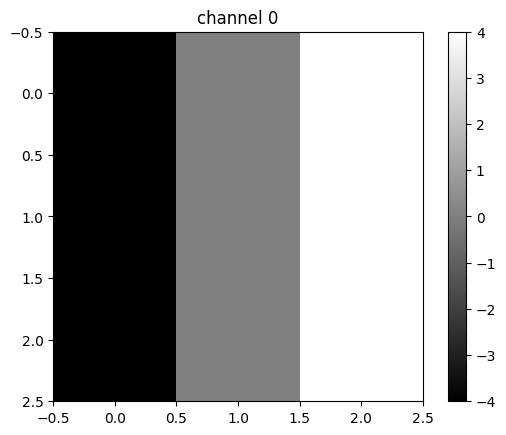

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


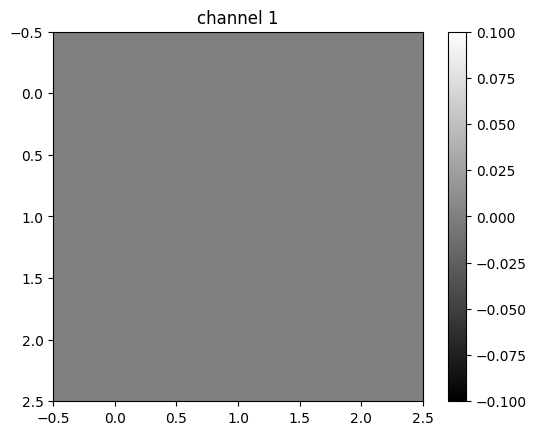

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


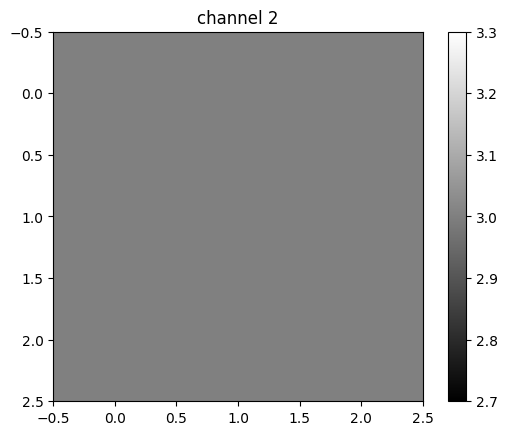

In [35]:
for channel,image in enumerate(out[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

tensor([[[[0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.],
          [1., 1., 1., 1., 1.],
          [0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0.]]]])


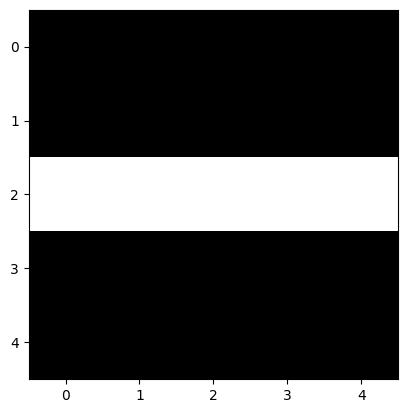

In [36]:
image1=torch.zeros(1,1,5,5)
image1[0,0,2,:]=1
print(image1)
plt.imshow(image1[0,0,:,:].detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
plt.show()

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], grad_fn=<UnbindBackward0>)


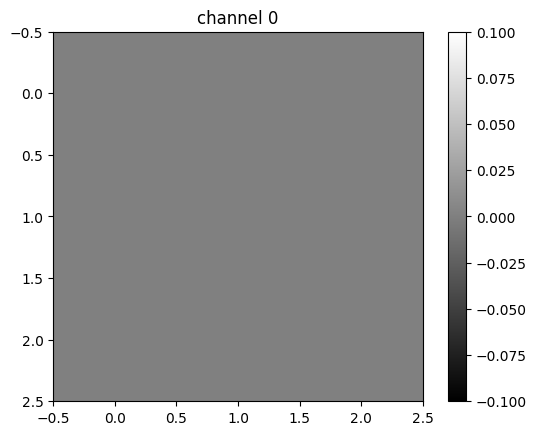

tensor([[-4., -4., -4.],
        [ 0.,  0.,  0.],
        [ 4.,  4.,  4.]], grad_fn=<UnbindBackward0>)


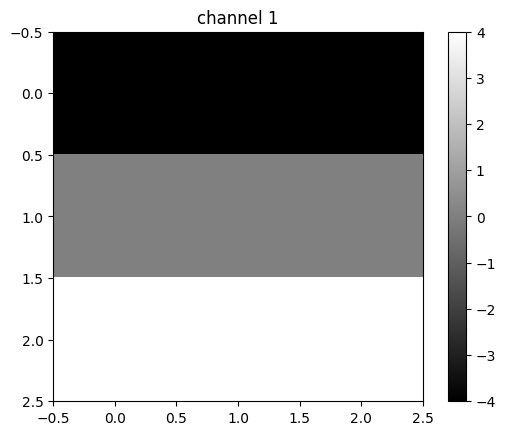

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], grad_fn=<UnbindBackward0>)


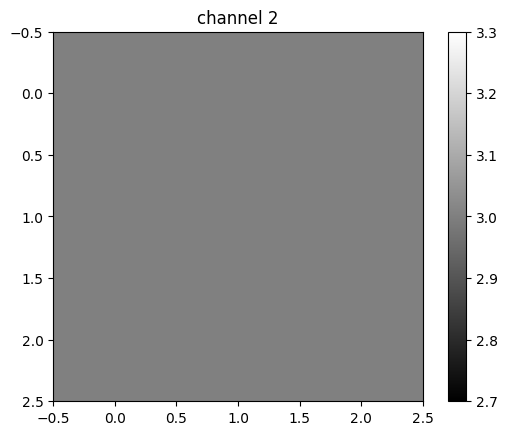

In [37]:
out1=conv1(image1)
for channel,image in enumerate(out1[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [38]:
image2=torch.zeros(1,2,5,5)
image2[0,0,2,:]=-2
image2[0,1,2,:]=1
image2

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [-2., -2., -2., -2., -2.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]],

         [[ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 1.,  1.,  1.,  1.,  1.],
          [ 0.,  0.,  0.,  0.,  0.],
          [ 0.,  0.,  0.,  0.,  0.]]]])

tensor([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [-2., -2., -2., -2., -2.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]])


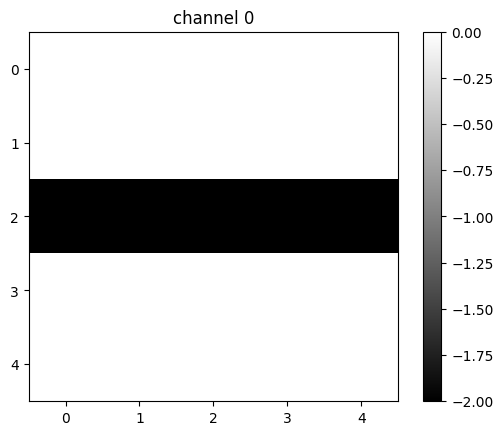

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


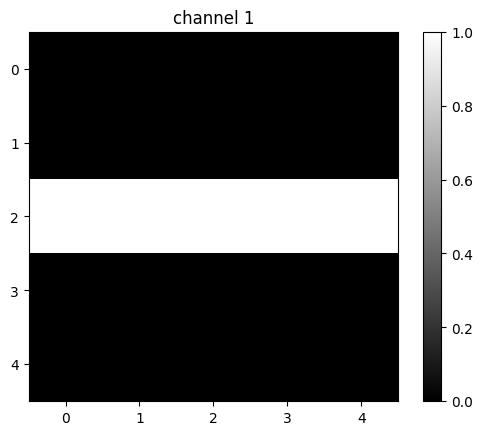

In [39]:
for channel,image in enumerate(image2[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [40]:
conv3 = nn.Conv2d(in_channels=2, out_channels=1,kernel_size=3)

In [41]:
Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv3.state_dict()['weight'][0][0]=1*Gx1
conv3.state_dict()['weight'][0][1]=-2*Gx1
conv3.state_dict()['bias'][:]=torch.tensor([0.0])

In [42]:
conv3.state_dict()['weight']

tensor([[[[ 0.,  0.,  0.],
          [ 0.,  1.,  0.],
          [ 0.,  0.,  0.]],

         [[-0., -0., -0.],
          [-0., -2., -0.],
          [-0., -0., -0.]]]])

In [43]:
conv3(image2)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<ConvolutionBackward0>)

In [44]:
conv4 = nn.Conv2d(in_channels=2, out_channels=3,kernel_size=3)
conv4.state_dict()['weight'][0][0]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][0][1]=torch.tensor([[0.0,0.0,0.0],[0,0.5,0],[0.0,0.0,0.0]])


conv4.state_dict()['weight'][1][0]=torch.tensor([[0.0,0.0,0.0],[0,1,0],[0.0,0.0,0.0]])
conv4.state_dict()['weight'][1][1]=torch.tensor([[0.0,0.0,0.0],[0,-1,0],[0.0,0.0,0.0]])

conv4.state_dict()['weight'][2][0]=torch.tensor([[1.0,0,-1.0],[2.0,0,-2.0],[1.0,0.0,-1.0]])
conv4.state_dict()['weight'][2][1]=torch.tensor([[1.0,2.0,1.0],[0.0,0.0,0.0],[-1.0,-2.0,-1.0]])

In [45]:
conv4.state_dict()['bias'][:]=torch.tensor([0.0,0.0,0.0])

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


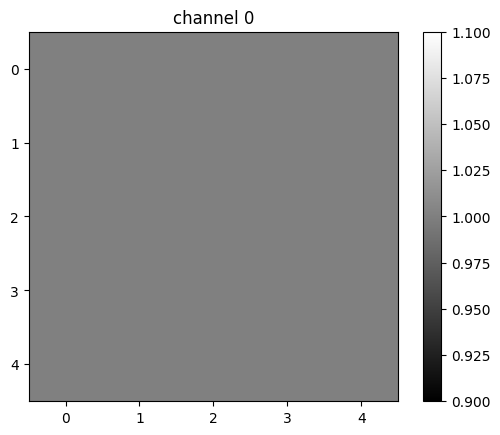

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


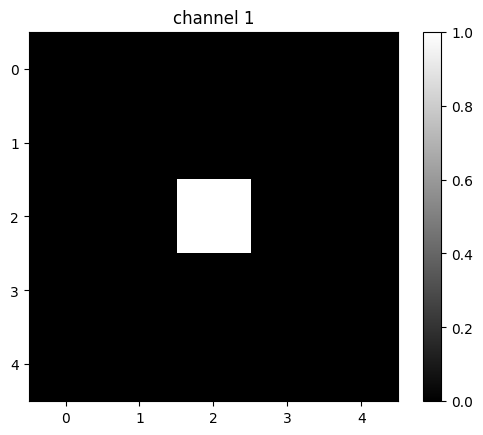

In [46]:
image4=torch.zeros(1,2,5,5)
image4[0][0]=torch.ones(5,5)
image4[0][1][2][2]=1
for channel,image in enumerate(image4[0]):
    plt.imshow(image.detach().numpy(), interpolation='nearest', cmap=plt.cm.gray)
    print(image)
    plt.title("channel {}".format(channel))
    plt.colorbar()
    plt.show()

In [47]:
z=conv4(image4)
z

tensor([[[[ 0.5000,  0.5000,  0.5000],
          [ 0.5000,  1.0000,  0.5000],
          [ 0.5000,  0.5000,  0.5000]],

         [[ 1.0000,  1.0000,  1.0000],
          [ 1.0000,  0.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000]],

         [[-1.0000, -2.0000, -1.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 1.0000,  2.0000,  1.0000]]]], grad_fn=<ConvolutionBackward0>)

In [48]:
imageA=torch.zeros(1,1,5,5)
imageB=torch.zeros(1,1,5,5)
imageA[0,0,2,:]=-2
imageB[0,0,2,:]=1


conv5 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)
conv6 = nn.Conv2d(in_channels=1, out_channels=1,kernel_size=3)


Gx1=torch.tensor([[0.0,0.0,0.0],[0,1.0,0],[0.0,0.0,0.0]])
conv5.state_dict()['weight'][0][0]=1*Gx1
conv6.state_dict()['weight'][0][0]=-2*Gx1
conv5.state_dict()['bias'][:]=torch.tensor([0.0])
conv6.state_dict()['bias'][:]=torch.tensor([0.0])

In [49]:
conv5(imageA)+conv6(imageB)

tensor([[[[ 0.,  0.,  0.],
          [-4., -4., -4.],
          [ 0.,  0.,  0.]]]], grad_fn=<AddBackward0>)

<h2>Convolutional Neural Network Architecture</h2>

<h3>Simple Example</h3>

In [50]:
torch.manual_seed(42)

In [51]:
def plot_channels(W):
    #number of output channels 
    n_out=W.shape[0]
    #number of input channels 
    n_in=W.shape[1]
    w_min=W.min().item()
    w_max=W.max().item()
    fig, axes = plt.subplots(n_out,n_in)
    fig.subplots_adjust(hspace = 0.1)
    out_index=0
    in_index=0
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
    
        if in_index>n_in-1:
            out_index=out_index+1
            in_index=0
              
        ax.imshow(W[out_index,in_index,:,:], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index=in_index+1

    plt.show()

In [52]:
def show_data(dataset,sample):

    plt.imshow(dataset.x[sample,0,:,:].numpy(),cmap='gray')
    plt.title('y='+str(dataset.y[sample].item()))
    plt.show()

In [53]:
from torch.utils.data import Dataset, DataLoader
class Data(Dataset):
    def __init__(self,N_images=100,offset=0,p=0.9, train=False):
        """
        p:portability that pixel is wight  
        N_images:number of images 
        offset:set a random vertical and horizontal offset images by a sample should be less than 3 
        """
        if train==True:
            np.random.seed(1)  
        
        #make images multiple of 3 
        N_images=2*(N_images//2)
        images=np.zeros((N_images,1,11,11))
        start1=3
        start2=1
        self.y=torch.zeros(N_images).type(torch.long)

        for n in range(N_images):
            if offset>0:
        
                low=int(np.random.randint(low=start1, high=start1+offset, size=1))
                high=int(np.random.randint(low=start2, high=start2+offset, size=1))
            else:
                low=4
                high=1
        
            if n<=N_images//2:
                self.y[n]=0
                images[n,0,high:high+9,low:low+3]= np.random.binomial(1, p, (9,3))
            elif  n>N_images//2:
                self.y[n]=1
                images[n,0,low:low+3,high:high+9] = np.random.binomial(1, p, (3,9))
           
        
        
        self.x=torch.from_numpy(images).type(torch.FloatTensor)
        self.len=self.x.shape[0]
        del(images)
        np.random.seed(0)
    def __getitem__(self,index):      
        return self.x[index],self.y[index]
    def __len__(self):
        return self.len

In [54]:
def plot_activations(A,number_rows= 1,name=""):
    A=A[0,:,:,:].detach().numpy()
    n_activations=A.shape[0]
    
    
    print(n_activations)
    A_min=A.min().item()
    A_max=A.max().item()

    if n_activations==1:

        # Plot the image.
        plt.imshow(A[0,:], vmin=A_min, vmax=A_max, cmap='seismic')

    else:
        fig, axes = plt.subplots(number_rows, n_activations//number_rows)
        fig.subplots_adjust(hspace = 0.4)
        for i,ax in enumerate(axes.flat):
            if i< n_activations:
                # Set the label for the sub-plot.
                ax.set_xlabel( "activation:{0}".format(i+1))

                # Plot the image.
                ax.imshow(A[i,:], vmin=A_min, vmax=A_max, cmap='seismic')
                ax.set_xticks([])
                ax.set_yticks([])
    plt.show()

In [55]:

def conv_output_shape(h_w, kernel_size=1, stride=1, pad=0, dilation=1):
    #by Duane Nielsen
    from math import floor
    if type(kernel_size) is not tuple:
        kernel_size = (kernel_size, kernel_size)
    h = floor( ((h_w[0] + (2 * pad) - ( dilation * (kernel_size[0] - 1) ) - 1 )/ stride) + 1)
    w = floor( ((h_w[1] + (2 * pad) - ( dilation * (kernel_size[1] - 1) ) - 1 )/ stride) + 1)
    return h, w

In [56]:
N_images=10000
train_dataset=Data(N_images=N_images)

In [57]:
validation_dataset=Data(N_images=1000,train=False)
validation_dataset

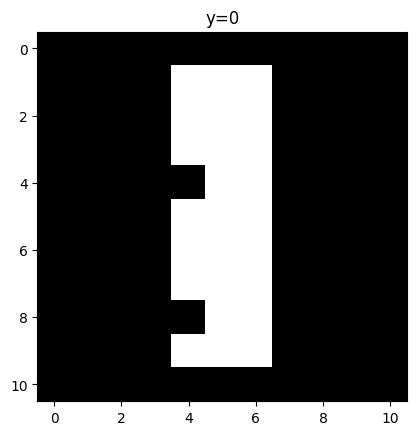

In [58]:
show_data(train_dataset,0)

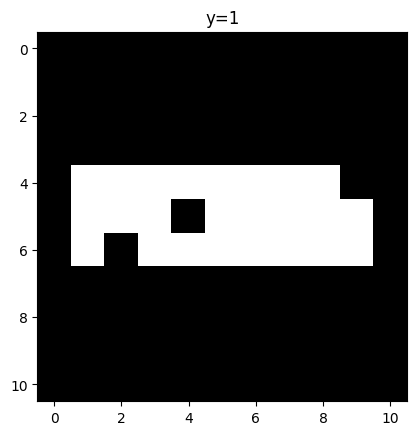

In [59]:
show_data(train_dataset,N_images//2+2)

In [60]:
out=conv_output_shape((11,11), kernel_size=2, stride=1, pad=0, dilation=1)
print(out)
out1=conv_output_shape(out, kernel_size=2, stride=1, pad=0, dilation=1)
print(out1)
out2=conv_output_shape(out1, kernel_size=2, stride=1, pad=0, dilation=1)
print(out2)

out3=conv_output_shape(out2, kernel_size=2, stride=1, pad=0, dilation=1)
print(out3)

(10, 10)
(9, 9)
(8, 8)
(7, 7)


In [61]:
class CNN(nn.Module):
    def __init__(self,out_1=2,out_2=1):
        
        super(CNN,self).__init__()
        #first Convolutional layers 
        self.cnn1=nn.Conv2d(in_channels=1,out_channels=out_1,kernel_size=2,padding=0)
        self.maxpool1=nn.MaxPool2d(kernel_size=2 ,stride=1)

        #second Convolutional layers
        self.cnn2=nn.Conv2d(in_channels=out_1,out_channels=out_2,kernel_size=2,stride=1,padding=0)
        self.maxpool2=nn.MaxPool2d(kernel_size=2 ,stride=1)
        #max pooling 

        #fully connected layer 
        self.fc1=nn.Linear(out_2*7*7,2)
        
    def forward(self,x):
        #first Convolutional layers
        x=self.cnn1(x)
        #activation function 
        x=torch.relu(x)
        #max pooling 
        x=self.maxpool1(x)
        #first Convolutional layers
        x=self.cnn2(x)
        #activation function
        x=torch.relu(x)
        #max pooling
        x=self.maxpool2(x)
        #flatten output 
        x=x.view(x.size(0),-1)
        #fully connected layer
        x=self.fc1(x)
        return x
    
    def activations(self,x):
        #outputs activation this is not necessary just for fun 
        z1=self.cnn1(x)
        a1=torch.relu(z1)
        out=self.maxpool1(a1)
        
        z2=self.cnn2(out)
        a2=torch.relu(z2)
        out=self.maxpool2(a2)
        out=out.view(out.size(0),-1)
        return z1,a1,z2,a2,out        

In [62]:
model=CNN(2,1)

In [63]:
model

CNN(
  (cnn1): Conv2d(1, 2, kernel_size=(2, 2), stride=(1, 1))
  (maxpool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (cnn2): Conv2d(2, 1, kernel_size=(2, 2), stride=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=49, out_features=2, bias=True)
)

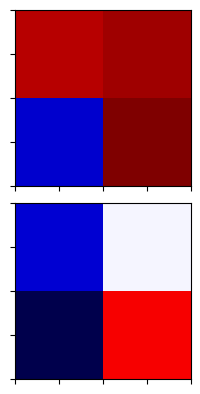

In [64]:
plot_channels(model.state_dict()['cnn1.weight'])


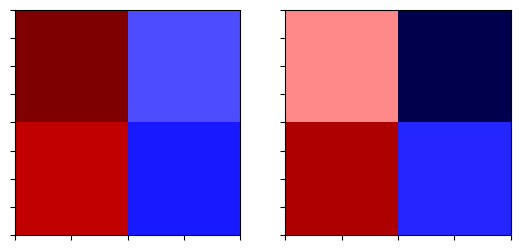

In [65]:
plot_channels(model.state_dict()['cnn2.weight'])

In [67]:
criterion=nn.CrossEntropyLoss()
learning_rate=0.001

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [68]:

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=10)
validation_loader=torch.utils.data.DataLoader(dataset=validation_dataset,batch_size=20)

In [69]:
n_epochs=10
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
cost=0
#n_epochs
for epoch in range(n_epochs):
    cost=0    
    for x, y in train_loader:
      

        #clear gradient 
        optimizer.zero_grad()
        #make a prediction 
        z=model(x)
        # calculate loss 
        loss=criterion(z,y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        cost+=loss.item()
    cost_list.append(cost)
        
        
    correct=0
    #perform a prediction on the validation  data  
    for x_test, y_test in validation_loader:

        z=model(x_test)
        _,yhat=torch.max(z.data,1)

        correct+=(yhat==y_test).sum().item()
        

    accuracy=correct/N_test

    accuracy_list.append(accuracy)
    

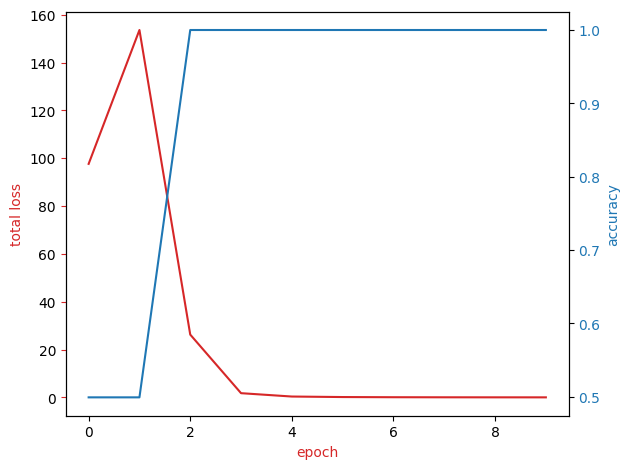

In [70]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()

In [71]:
model.state_dict()['cnn1.weight']

tensor([[[[ 0.4291,  0.5193],
          [-0.0385,  0.5973]]],


        [[[ 0.3052,  0.3551],
          [ 0.2855,  0.5221]]]])

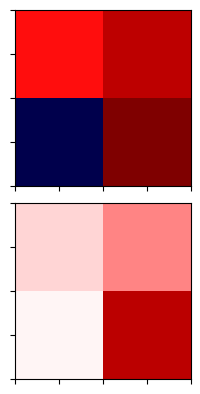

In [72]:
plot_channels(model.state_dict()['cnn1.weight'])

In [73]:
model.state_dict()['cnn1.weight'];

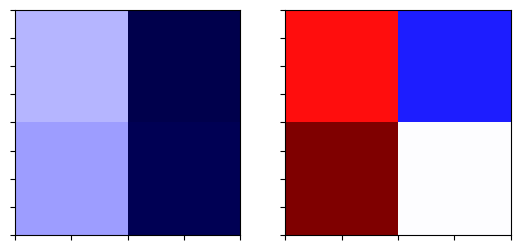

In [74]:
plot_channels(model.state_dict()['cnn2.weight'])

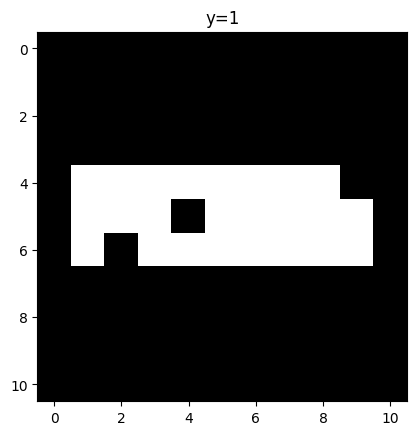

In [75]:
show_data(train_dataset,N_images//2+2)

In [76]:
out=model.activations(train_dataset[N_images//2+2][0].view(1,1,11,11))
out=model.activations(train_dataset[0][0].view(1,1,11,11))

2


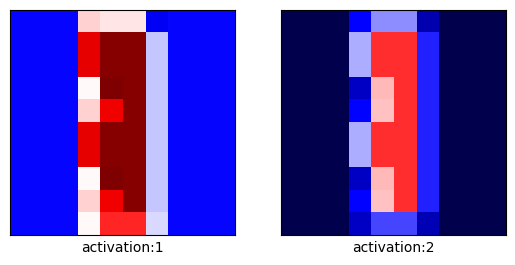

In [77]:
plot_activations(out[0],number_rows=1,name=" feature map")
plt.show()

1


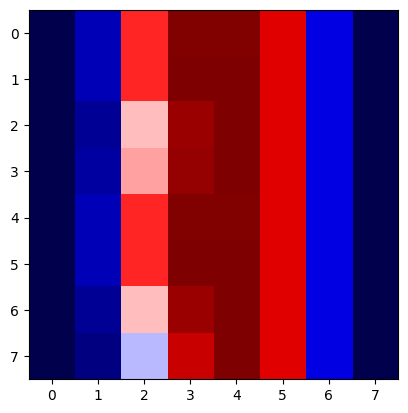

In [78]:
plot_activations(out[2],number_rows=1,name="2nd feature map")
plt.show()

1


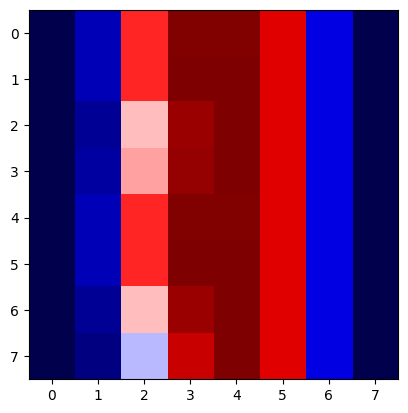

In [79]:
plot_activations(out[3],number_rows=1,name="first feature map")
plt.show()

In [80]:
out1=out[4][0].detach().numpy()

In [81]:
out0=model.activations(train_dataset[100][0].view(1,1,11,11))[4][0].detach().numpy()
out0

array([0.5685774 , 2.6530755 , 3.696976  , 3.696976  , 3.696976  ,
       3.0058057 , 0.79018855, 0.5685774 , 2.6530755 , 3.696976  ,
       3.696976  , 3.696976  , 3.0058057 , 0.79018855, 0.5685774 ,
       2.6530755 , 3.6992896 , 3.7121093 , 3.7121093 , 3.0186255 ,
       0.79018855, 0.5685774 , 2.6530755 , 3.6992896 , 3.7121093 ,
       3.7121093 , 3.0186255 , 0.79018855, 0.5685774 , 2.545471  ,
       3.290754  , 3.480741  , 3.480741  , 2.8580778 , 0.79018855,
       0.5685774 , 2.6530755 , 3.696976  , 3.696976  , 3.696976  ,
       3.0058057 , 0.79018855, 0.5685774 , 2.6530755 , 3.696976  ,
       3.696976  , 3.696976  , 3.008119  , 0.8030085 ], dtype=float32)

Text(0, 0.5, 'Activation')

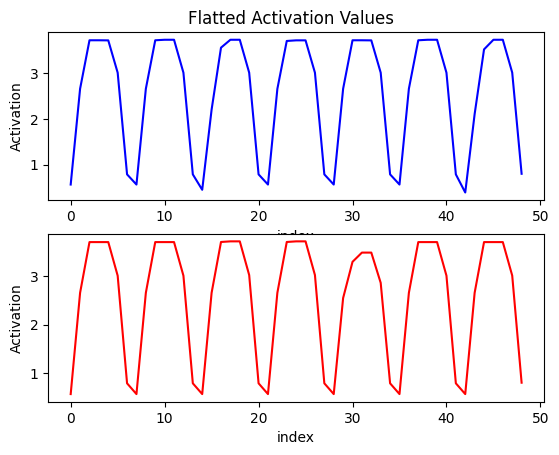

In [82]:
plt.subplot(2, 1, 1)
plt.plot( out1, 'b')
plt.title('Flatted Activation Values  ')
plt.ylabel('Activation')
plt.xlabel('index')
plt.subplot(2, 1, 2)
plt.plot(out0, 'r')
plt.xlabel('index')
plt.ylabel('Activation')

<h3>Convolutional Neural Network MNIST</h3>

In [162]:
import torchvision.transforms as transforms
import torchvision.datasets as dsets
torch.cuda.is_available()#for use cuda

True

In [163]:
device=torch.device('cuda:0')#for use cuda

In [164]:
# Define the function for plotting the channels

def plot_channels(W):
    n_out = W.shape[0]
    n_in = W.shape[1]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(n_out, n_in)
    fig.subplots_adjust(hspace=0.1)
    out_index = 0
    in_index = 0
    
    #plot outputs as rows inputs as columns 
    for ax in axes.flat:
        if in_index > n_in-1:
            out_index = out_index + 1
            in_index = 0
        ax.imshow(W[out_index, in_index, :, :], vmin=w_min, vmax=w_max, cmap='seismic')
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        in_index = in_index + 1

    plt.show()

In [165]:
# Define the function for plotting the parameters

def plot_parameters(W, number_rows=1, name="", i=0):
    W = W.data[:, i, :, :]
    n_filters = W.shape[0]
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(number_rows, n_filters // number_rows)
    fig.subplots_adjust(hspace=0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_filters:
            # Set the label for the sub-plot.
            ax.set_xlabel("kernel:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(W[i, :], vmin=w_min, vmax=w_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.suptitle(name, fontsize=10)    
    plt.show()

In [166]:
# Define the function for plotting the activations

def plot_activations(A, number_rows=1, name="", i=0):
    A = A[0, :, :, :].detach().numpy()
    n_activations = A.shape[0]
    A_min = A.min().item()
    A_max = A.max().item()
    fig, axes = plt.subplots(number_rows, n_activations // number_rows)
    fig.subplots_adjust(hspace = 0.4)

    for i, ax in enumerate(axes.flat):
        if i < n_activations:
            # Set the label for the sub-plot.
            ax.set_xlabel("activation:{0}".format(i + 1))

            # Plot the image.
            ax.imshow(A[i, :], vmin=A_min, vmax=A_max, cmap='seismic')
            ax.set_xticks([])
            ax.set_yticks([])
    plt.show()

In [167]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [168]:

IMAGE_SIZE = 16


composed = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)), transforms.ToTensor()])

In [169]:
train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=composed)
# Make the validating 

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=composed)

In [170]:
# Show the data type for each element in dataset

type(train_dataset[0][1])

int

In [171]:
# The label for the fourth data element

train_dataset[3][1]

1

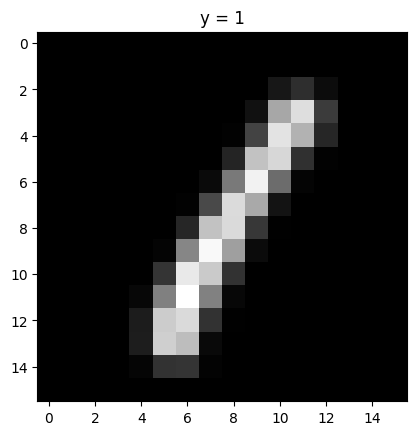

In [172]:
# The image for the fourth data element
show_data(train_dataset[3])


In [188]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x
    
    # Outputs in each steps
    def activations(self, x):
        #outputs activation this is not necessary
        z1 = self.cnn1(x)
        a1 = torch.relu(z1)
        out = self.maxpool1(a1)
        
        z2 = self.cnn2(out)
        a2 = torch.relu(z2)
        out1 = self.maxpool2(a2)
        out = out.view(out.size(0),-1)
        return z1, a1, z2, a2, out1,out

In [189]:
# Create the model object using CNN class

model = CNN(out_1=16, out_2=32).to(device) #for use cuda
model_cpu=CNN(out_1=16, out_2=32).cpu()

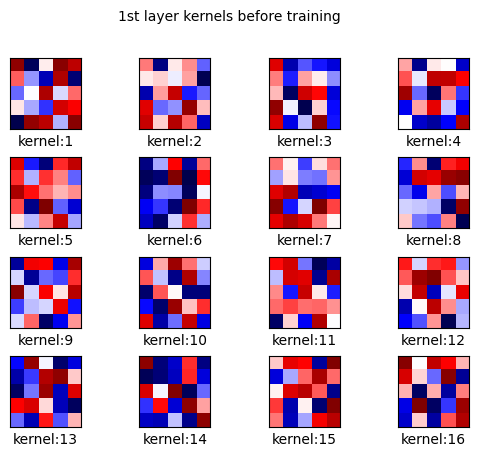

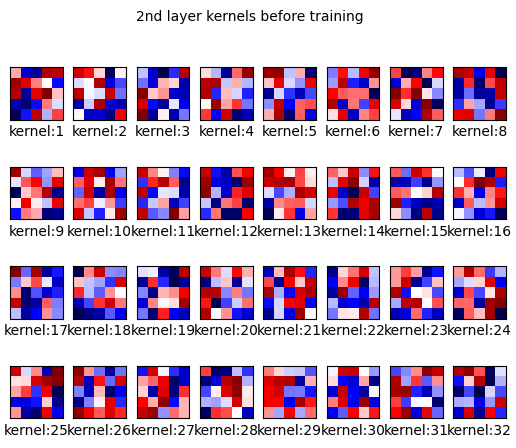

In [190]:
# Plot the parameters

plot_parameters(model_cpu.state_dict()['cnn1.weight'], number_rows=4, name="1st layer kernels before training ")
plot_parameters(model_cpu.state_dict()['cnn2.weight'], number_rows=4, name='2nd layer kernels before training' )

In [191]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [194]:
# Train the model

n_epochs=3
cost_list=[]
accuracy_list=[]
N_test=len(validation_dataset)
COST=0

def train_model(n_epochs):
    for epoch in range(n_epochs):
        COST=0
        for x, y in train_loader:
            x,y=x.to(device),y.to(device) #for use cuda
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            COST+=loss.data
            cost_cpu=COST.cpu()
        cost_list.append(cost_cpu)
        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            x_test,y_test=x_test.to(device),y_test.to(device) #for use cuda
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
train_model(n_epochs)

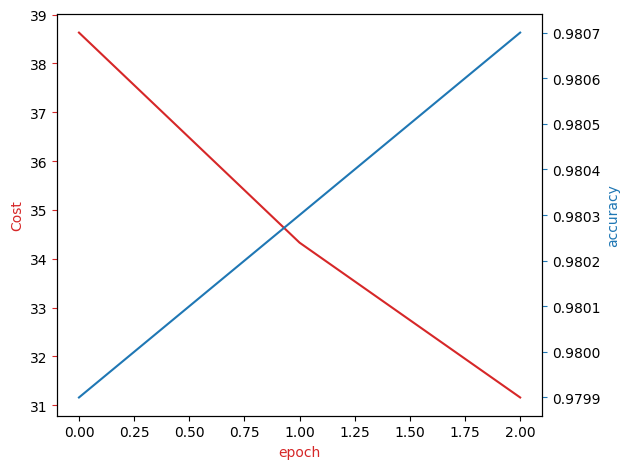

In [195]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(cost_list, color=color)
ax1.set_xlabel('epoch', color=color)
ax1.set_ylabel('Cost', color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color) 
ax2.set_xlabel('epoch', color=color)
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

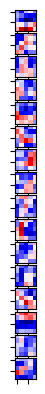

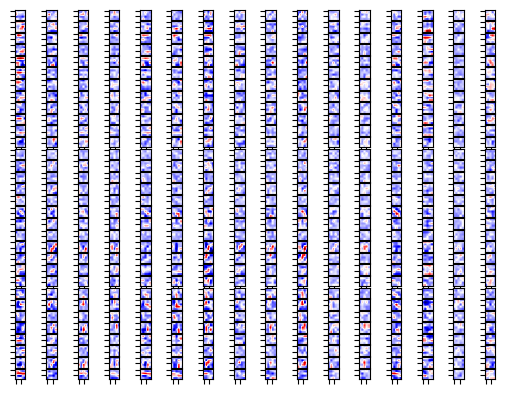

In [196]:
# Plot the channels

plot_channels(model.cpu().state_dict()['cnn1.weight'])
plot_channels(model.cpu().state_dict()['cnn2.weight'])

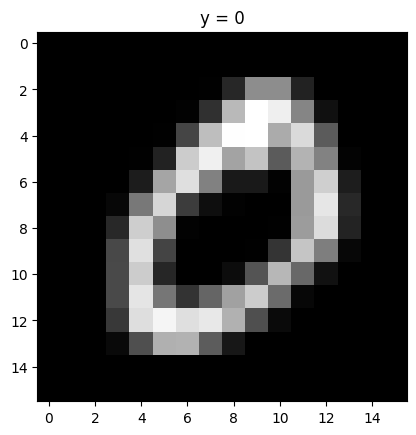

In [197]:
# Show the second image

show_data(train_dataset[1])

In [198]:
# Use the CNN activations class to see the steps

out = model.activations(train_dataset[1][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

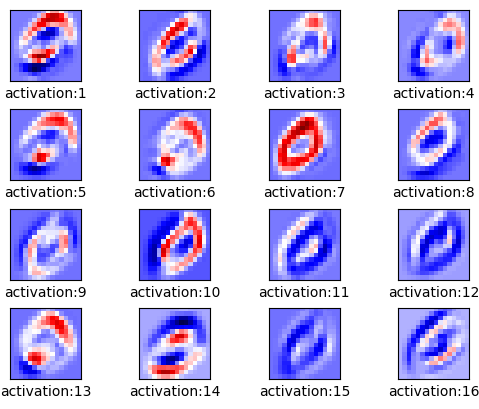

In [199]:
# Plot the outputs after the first CNN

plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

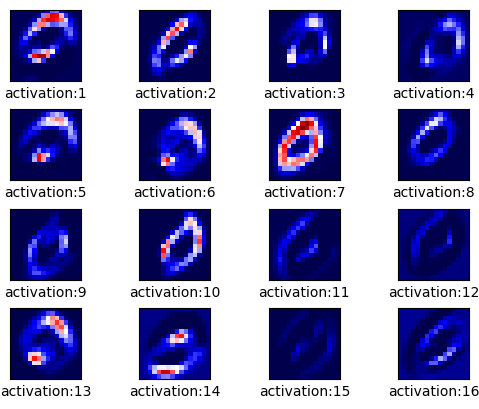

In [200]:
# Plot the outputs after the first Relu

plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

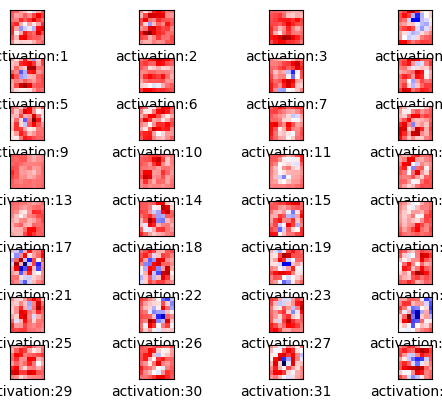

In [201]:
# Plot the outputs after the second CNN

plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

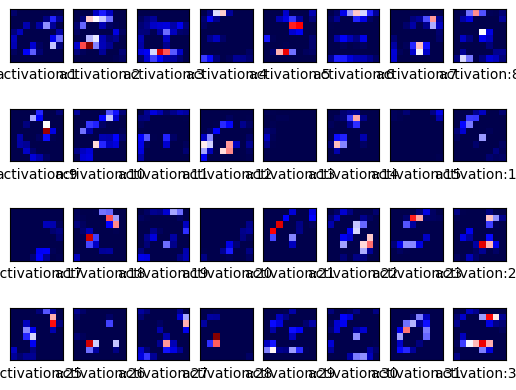

In [202]:
# Plot the outputs after the second Relu

plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

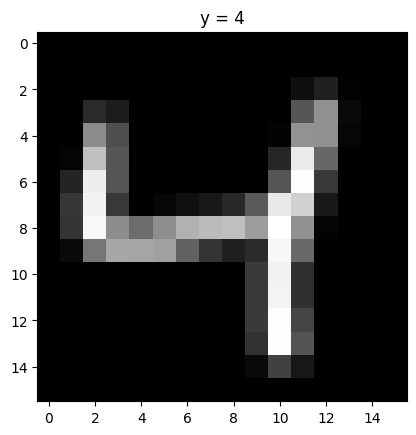

In [203]:
# Show the third image

show_data(train_dataset[2])

In [204]:
# Use the CNN activations class to see the steps

out = model.activations(train_dataset[2][0].view(1, 1, IMAGE_SIZE, IMAGE_SIZE))

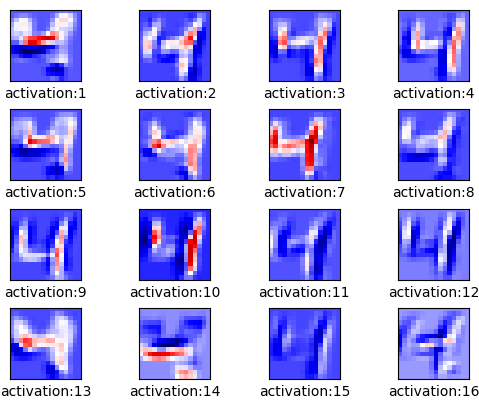

In [205]:
# Plot the outputs after the first CNN

plot_activations(out[0], number_rows=4, name="Output after the 1st CNN")

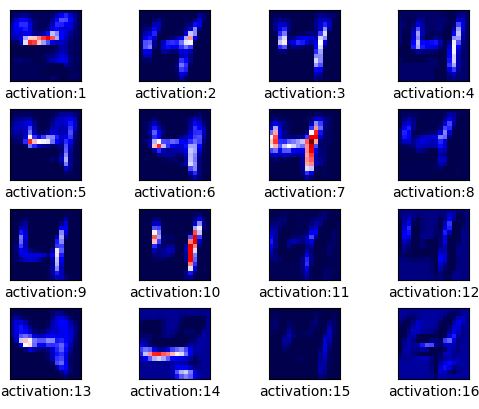

In [206]:
# Plot the outputs after the first Relu

plot_activations(out[1], number_rows=4, name="Output after the 1st Relu")

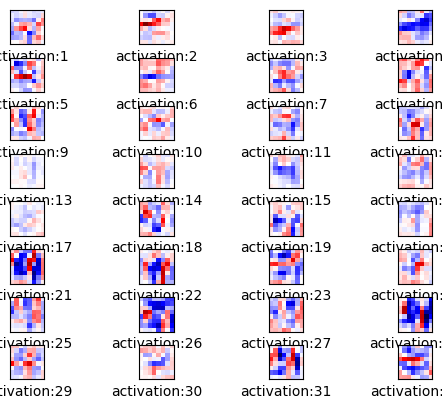

In [207]:
# Plot the outputs after the second CNN

plot_activations(out[2], number_rows=32 // 4, name="Output after the 2nd CNN")

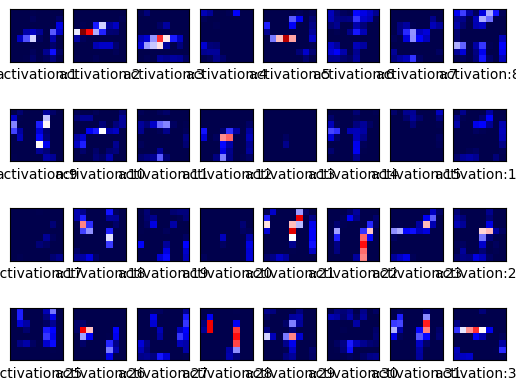

In [208]:
# Plot the outputs after the second Relu

plot_activations(out[3], number_rows=4, name="Output after the 2nd Relu")

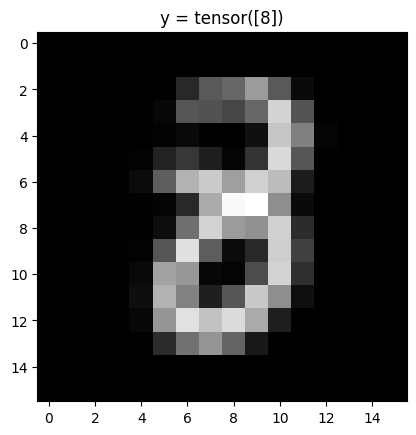

yhat:  tensor([3])


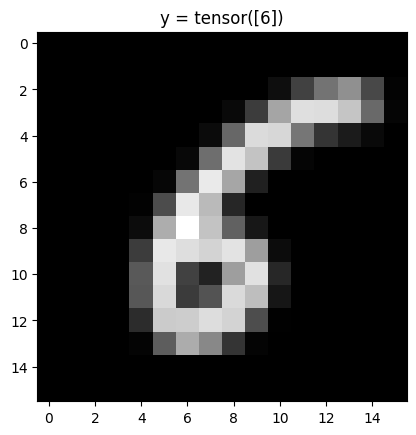

yhat:  tensor([5])


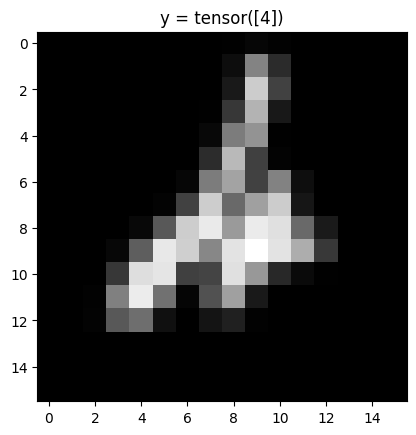

yhat:  tensor([2])


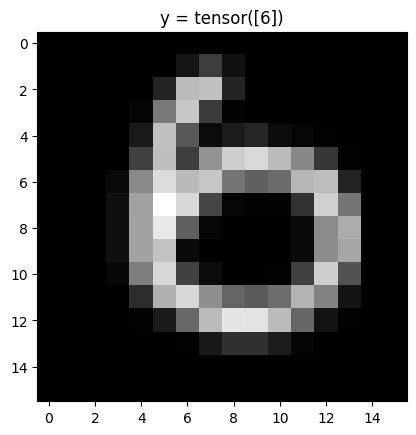

yhat:  tensor([0])


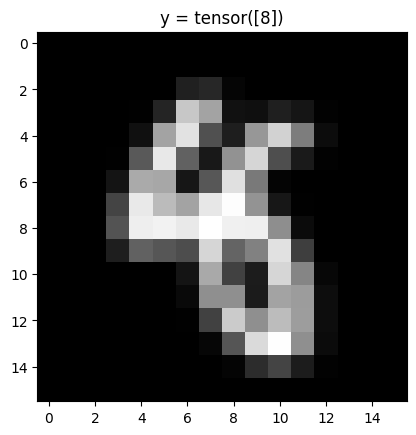

yhat:  tensor([4])


In [209]:
# Plot the mis-classified samples

count = 0
for x, y in torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=1):
    z = model(x)
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break  

<h3>Batch Norm for Convolution Operation  </h3>

In [210]:
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(IMAGE_SIZE, IMAGE_SIZE), cmap='gray')
    plt.title('y = '+ str(data_sample[1]))

In [211]:
# The label for the fourth data element

train_dataset[3][1]

1

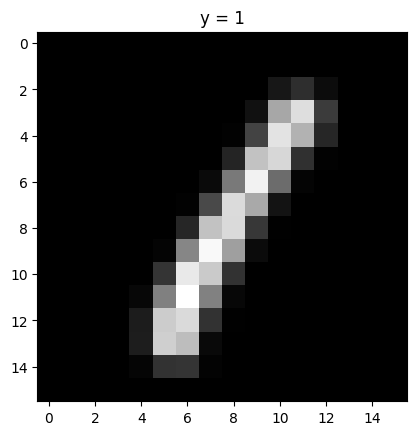

In [212]:
# The image for the fourth data element
show_data(train_dataset[3])


In [213]:
class CNN(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32):
        super(CNN, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.maxpool1=nn.MaxPool2d(kernel_size=2)

        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, 10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x


In [214]:
class CNN_batch(nn.Module):
    
    # Contructor
    def __init__(self, out_1=16, out_2=32,number_of_classes=10):
        super(CNN_batch, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels=1, out_channels=out_1, kernel_size=5, padding=2)
        self.conv1_bn = nn.BatchNorm2d(out_1)

        self.maxpool1=nn.MaxPool2d(kernel_size=2)
        
        self.cnn2 = nn.Conv2d(in_channels=out_1, out_channels=out_2, kernel_size=5, stride=1, padding=2)
        self.conv2_bn = nn.BatchNorm2d(out_2)

        self.maxpool2=nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(out_2 * 4 * 4, number_of_classes)
        self.bn_fc1 = nn.BatchNorm1d(10)
    
    # Prediction
    def forward(self, x):
        x = self.cnn1(x)
        x=self.conv1_bn(x)
        x = torch.relu(x)
        x = self.maxpool1(x)
        x = self.cnn2(x)
        x=self.conv2_bn(x)
        x = torch.relu(x)
        x = self.maxpool2(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x=self.bn_fc1(x)
        return x

In [215]:
def train_model(model,train_loader,validation_loader,optimizer,n_epochs=4):
    
    #global variable 
    N_test=len(validation_dataset)
    accuracy_list=[]
    loss_list=[]
    for epoch in range(n_epochs):
        for x, y in train_loader:
            model.train()
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            loss_list.append(loss.data)

        correct=0
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            model.eval()
            z = model(x_test)
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        accuracy_list.append(accuracy)
     
    return accuracy_list, loss_list

In [216]:
# Create the model object using CNN class
model = CNN(out_1=16, out_2=32)

In [217]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [218]:
# Train the model
accuracy_list_normal, loss_list_normal=train_model(model=model,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

In [ ]:
model_batch=CNN_batch(out_1=16, out_2=32)
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
optimizer = torch.optim.SGD(model_batch.parameters(), lr = learning_rate)
accuracy_list_batch, loss_list_batch=train_model(model=model_batch,n_epochs=10,train_loader=train_loader,validation_loader=validation_loader,optimizer=optimizer)

In [ ]:
# Plot the loss and accuracy

plt.plot(loss_list_normal, 'b',label='loss normal cnn ')
plt.plot(loss_list_batch,'r',label='loss batch cnn')
plt.xlabel('iteration')
plt.title("loss")
plt.legend()

In [ ]:
plt.plot(accuracy_list_normal, 'b',label=' normal CNN')
plt.plot(accuracy_list_batch,'r',label=' CNN with Batch Norm')
plt.xlabel('Epoch')
plt.title("Accuracy ")
plt.legend()
plt.show()